#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Fri Dec  1 15:49:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [9]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=20bb11dee41730ac737fae0c66cad1d0dd3cf41f23fca65b0d7979b8c8eeded2
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wljVdE3GLoIXjaLaV0I1")
project = rf.workspace("sandeep-4366p").project("potholedetectionyolov8-swret")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PotholeDetectionYOLOv8-1 in yolov5pytorch:: 100%|██████████| 484/484 [00:00<00:00, 4508.75it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/PotholeDetectionYOLOv8-1


In [19]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/PotholeDetectionYOLOv8/data.yaml epochs=70 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 302MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/PotholeDetectionYOLOv8/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, mo

In [20]:
!ls {HOME}//runs/detect/train

args.yaml					    R_curve.png		train_batch781.jpg
confusion_matrix.png				    results.csv		train_batch782.jpg
events.out.tfevents.1701446236.3e7944b87089.2490.0  results.png		val_batch0_labels.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_pred.jpg
P_curve.png					    train_batch1.jpg	weights
PR_curve.png					    train_batch2.jpg
predictions.json				    train_batch780.jpg


#**Displaying the Confusion Matrix**

/content


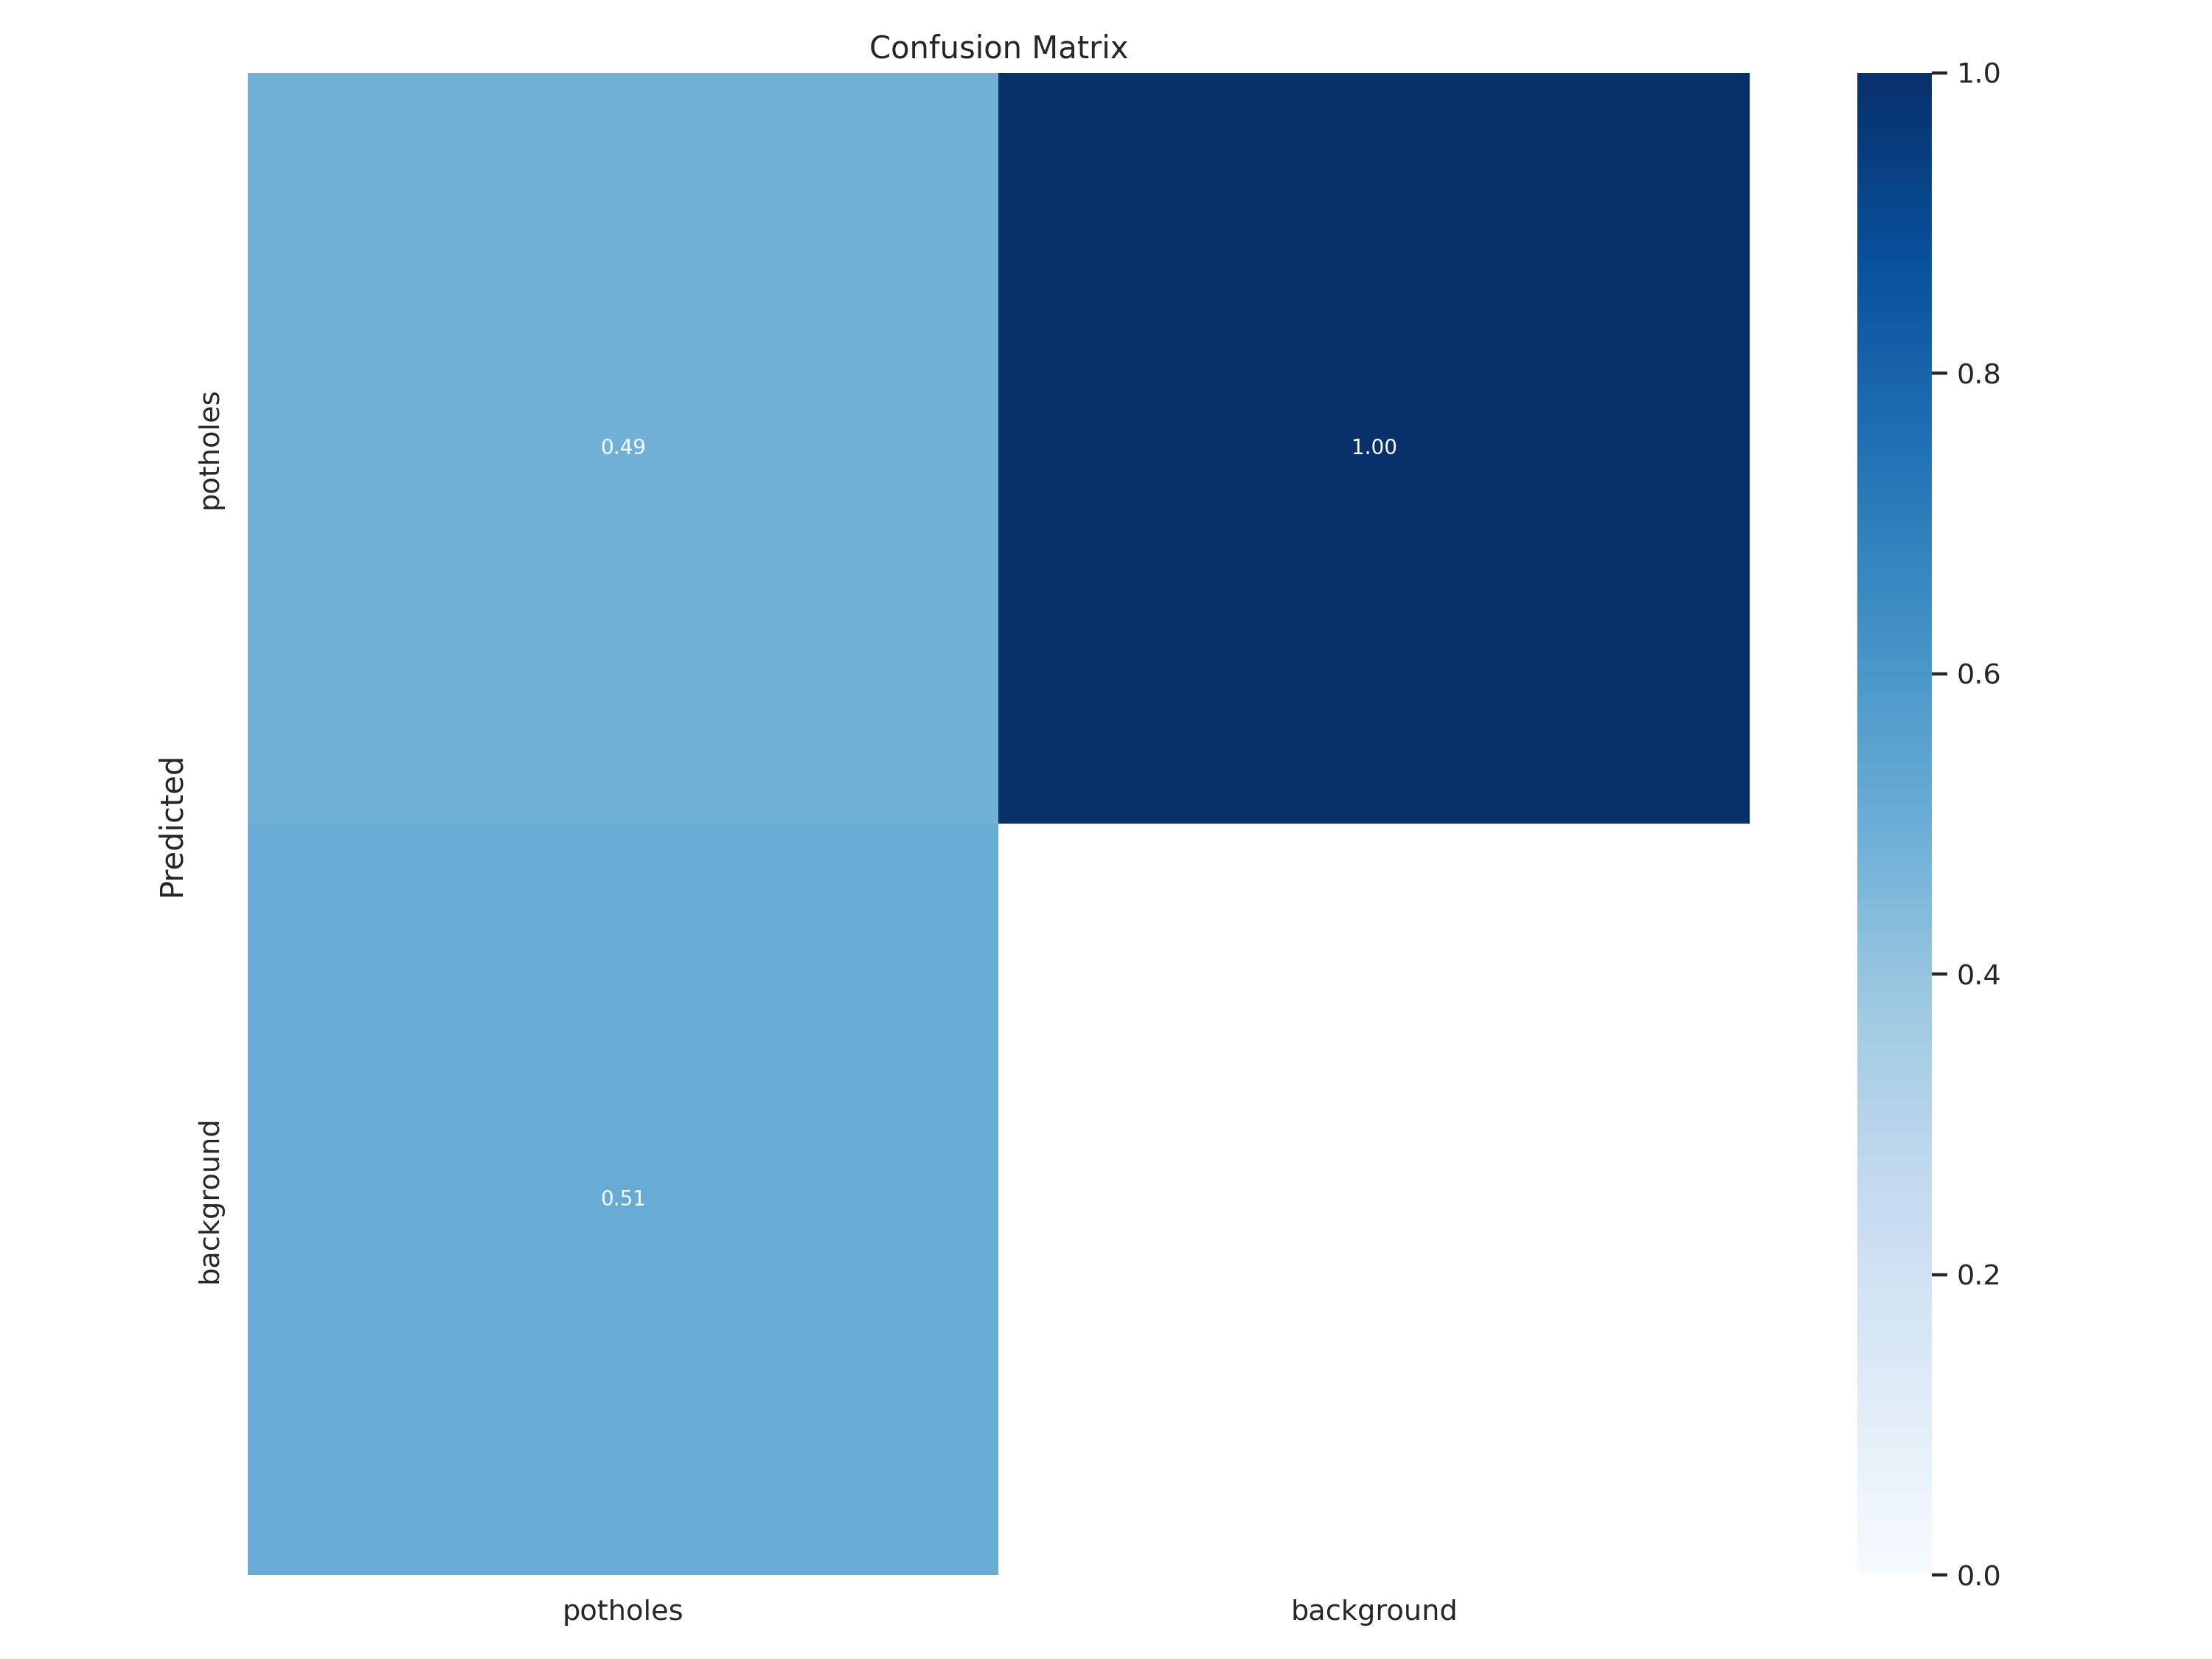

In [21]:
## Conclusion:
#49% of the time the model detected correctly that there is a pothole, while 51% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


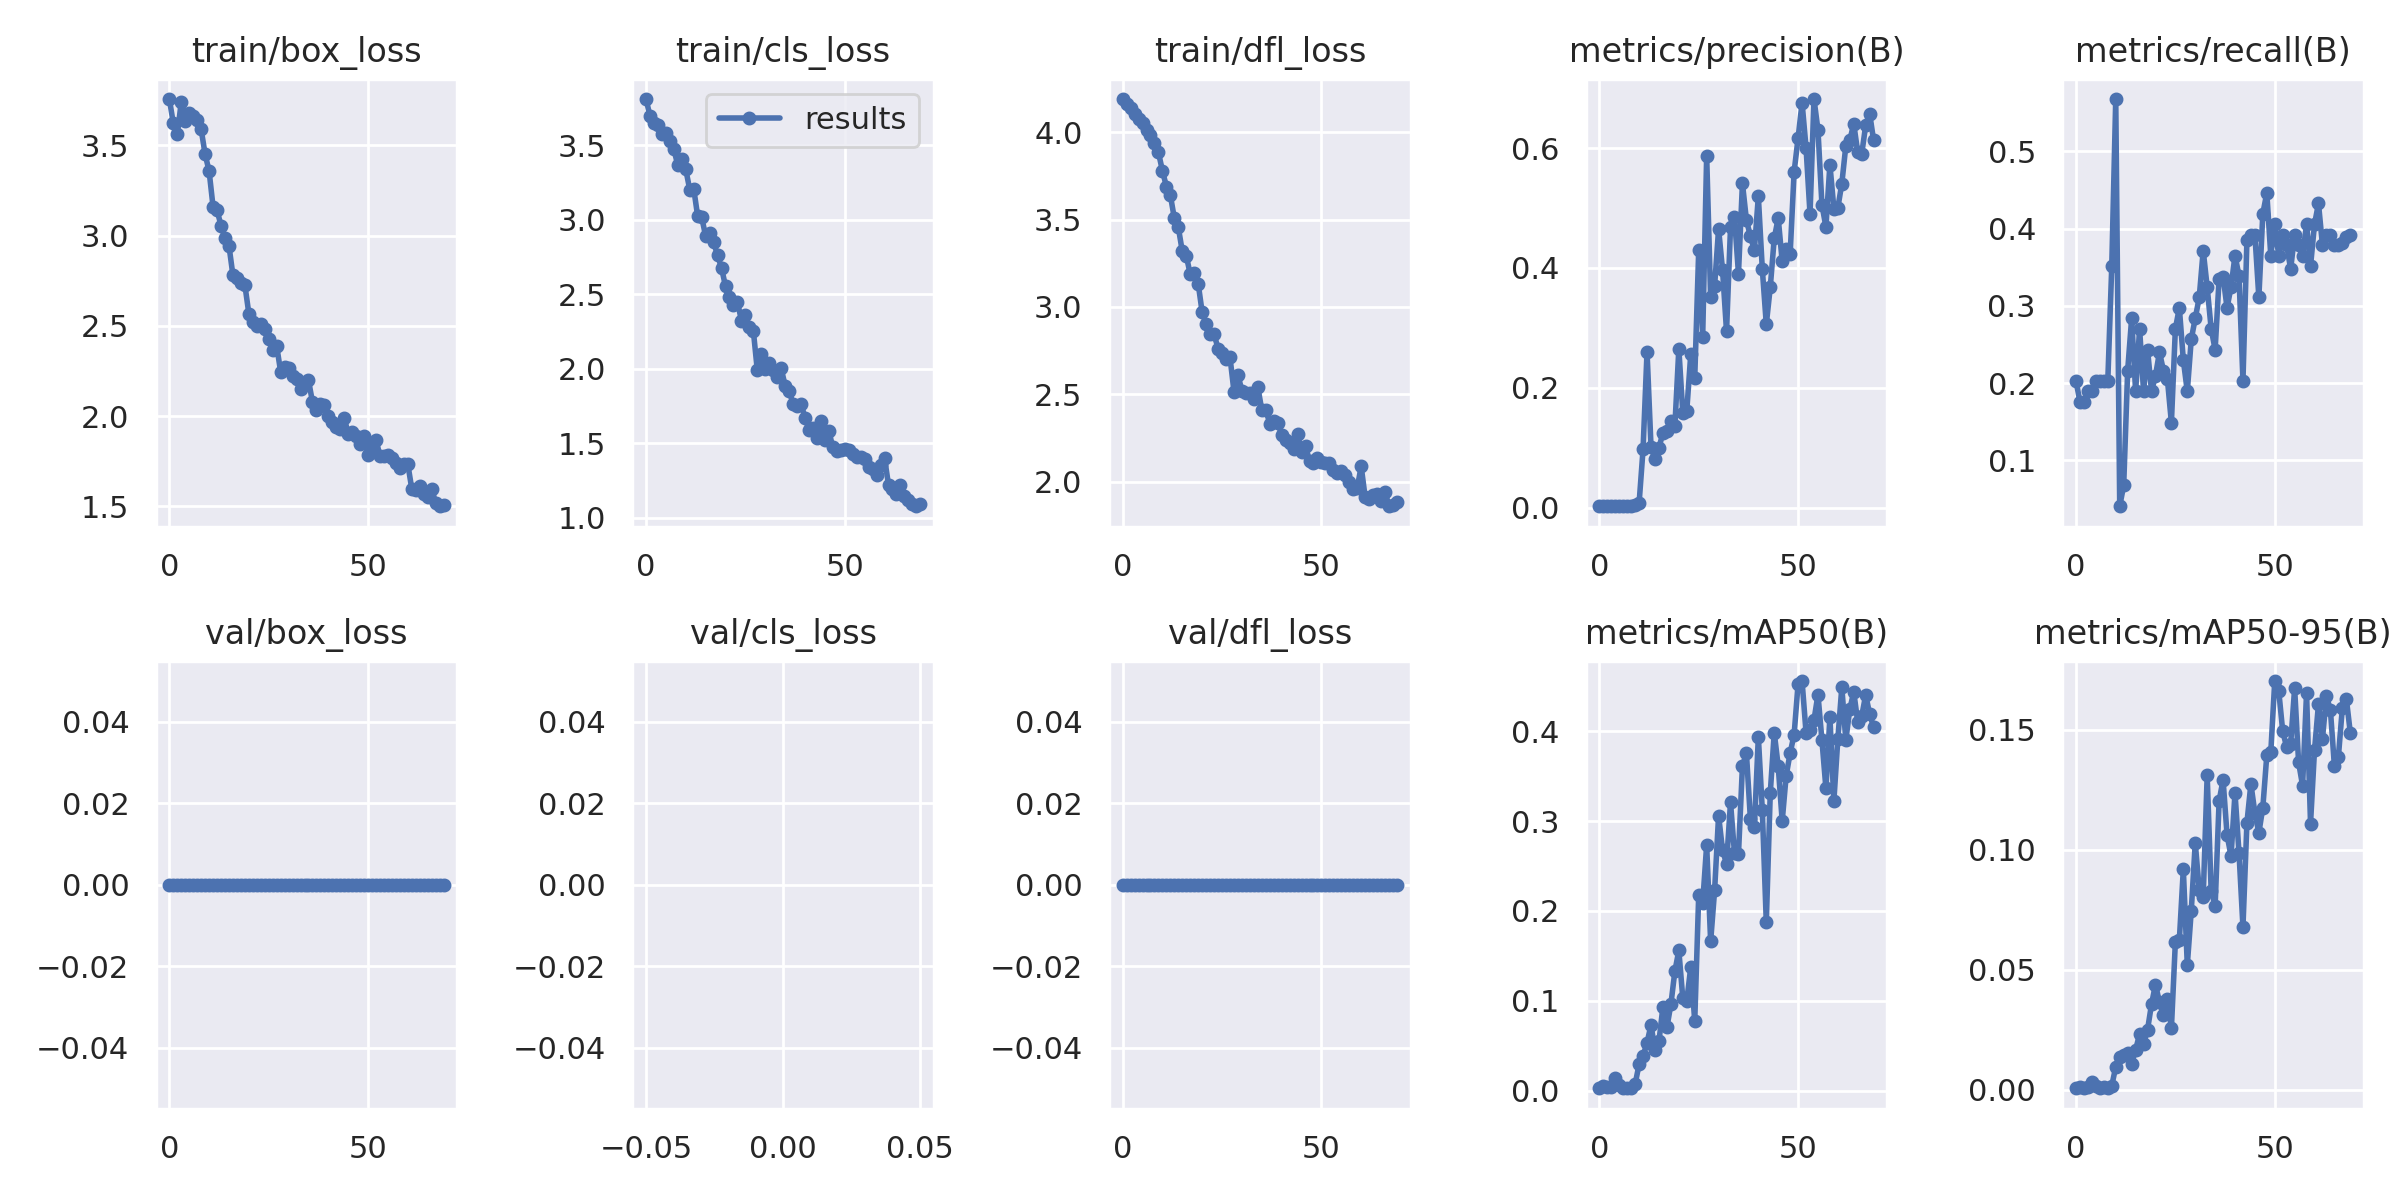

In [22]:
# less dataset and epoches giving less convergence and accuracy
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


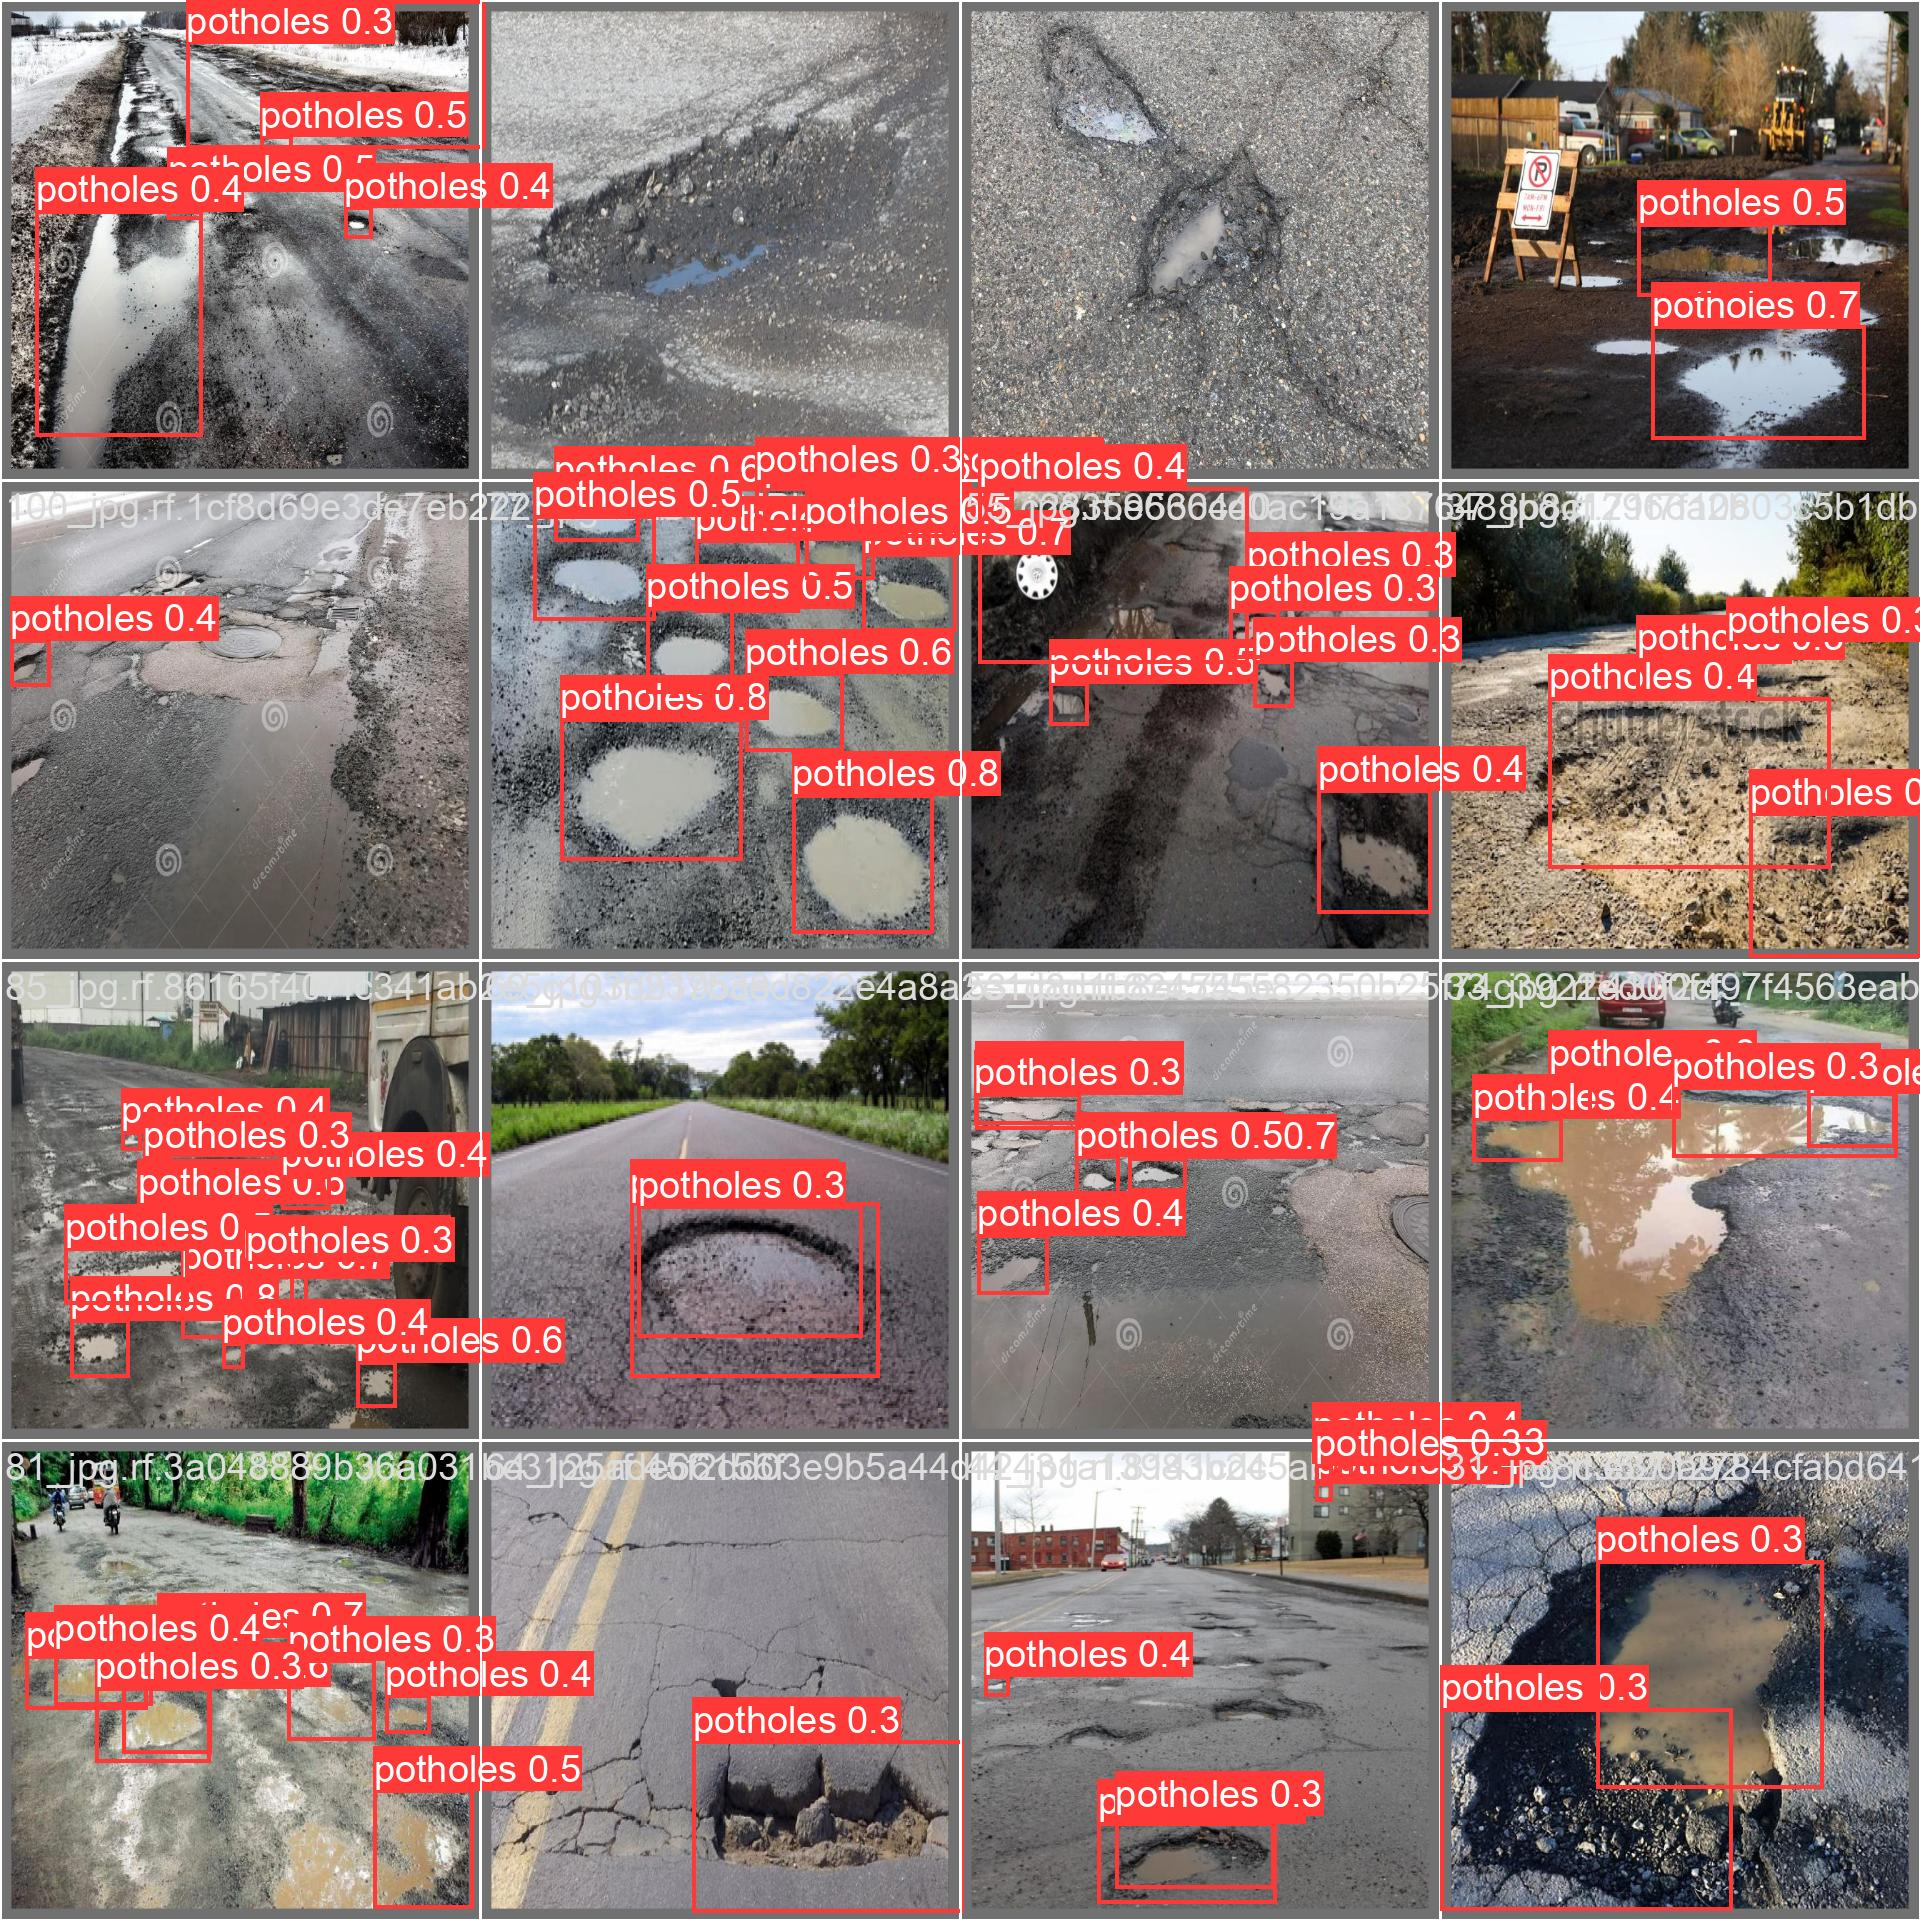

In [23]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [24]:
#validating with images using best.pt weights

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/PotholeDetectionYOLOv8/data.yaml

/content
2023-12-01 16:21:08.644416: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 16:21:08.644490: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 16:21:08.644532: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 16:21:10.454902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/PotholeDetectionYOLO

#**Inference with Custom Model**

In [25]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/PotholeDetectionYOLOv8/test/images

/content
2023-12-01 16:22:24.733313: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 16:22:24.733381: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 16:22:24.733419: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 16:22:26.035285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/10 /content/datasets/PotholeDetectionYOLOv8/

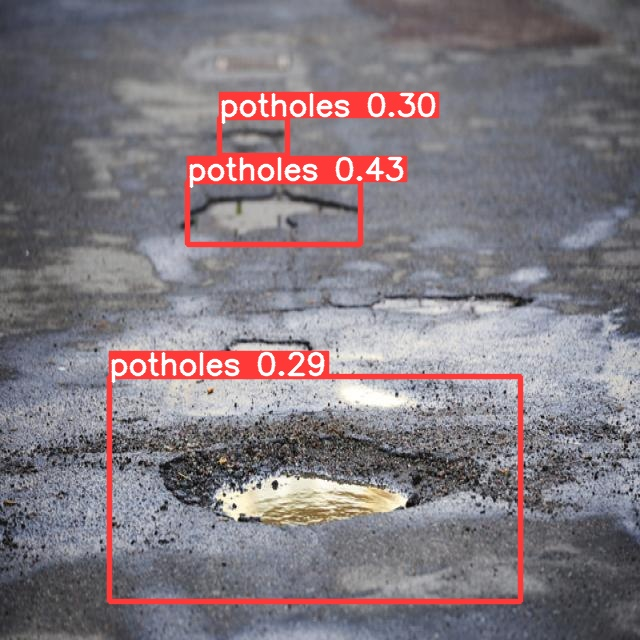

In [27]:
Image("/content/runs/detect/predict/1.jpg")


#**Testing on a Demo Video**

In [28]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 65.6MB/s]


In [29]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2023-12-01 16:24:44.369548: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 16:24:44.369610: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 16:24:44.369650: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 16:24:45.566045: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 1 potho

#**Display the Demo Video**

In [30]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [31]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)